In [2]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
## load the dataset 

data  = xr.open_dataset('datasets/air.mon.ltm.nc')
data

/home/posiden/anaconda3/envs/climate-gpt/lib/python3.9/site-packages/xarray/coding/times.py:992: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/posiden/anaconda3/envs/climate-gpt/lib/python3.9/site-packages/xarray/core/indexing.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


<xarray.Dataset> Size: 17MB
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 68B 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 292B 90.0 87.5 85.0 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 576B 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] 192B ...
    air                 (time, level, lat, lon) float32 9MB ...
    valid_yr_count      (time, level, lat, lon) float32 9MB ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Created 2022/01/11 by doMonthLTMNC4
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...

In [5]:
## here we can see the variables are three , but we only need air as that is the one that contains the info we need 

# extract air variable 

data = data['air']
data

<xarray.DataArray 'air' (time: 12, level: 17, lat: 73, lon: 144)> Size: 9MB
[2144448 values with dtype=float32]
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes: (12/14)
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (monthly from 6-hourly values)
    valid_range:    [137.5 362.5]
    actual_range:   [183.01205 314.30197]

In [6]:
## now since we have lat , lon and time available

## now let us play around and try differnt types of visualisations 

# take the mean along the time and lat and lon to just see the vertical levels structure coming along 


data_levels = data.mean(dim=['lat','lon','time'])

data_levels

<xarray.DataArray 'air' (level: 17)> Size: 68B
array([281.26266, 277.56396, 274.45526, 267.00372, 260.8889 , 252.58217,
       242.07874, 229.63977, 223.56425, 218.62984, 213.85156, 209.06587,
       209.71344, 212.36491, 216.39   , 220.05284, 227.04445],
      dtype=float32)
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0

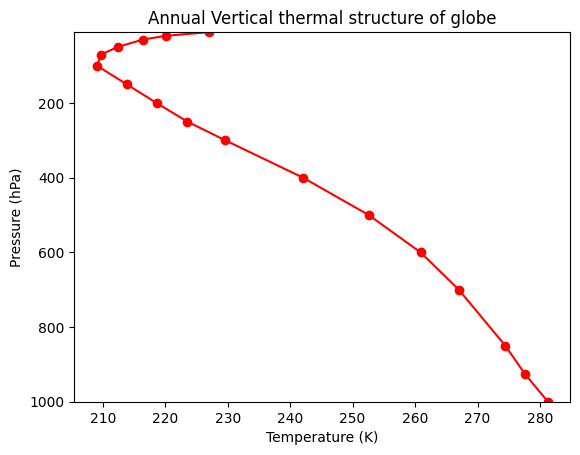

In [14]:
plt.plot(data_levels, data_levels.level,'ro-')
plt.ylim(max(data_levels.level),min(data_levels.level))
# inverse the y axis 
# plt.gca().invert_yaxis()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Annual Vertical thermal structure of globe')
plt.show()


In [15]:
# Extract the month from the time coordinate
months = data.time.dt.month  # Extracts month numbers

# Select only the months corresponding to JJAS (6, 7, 8, 9)
data_jjas = data.sel(time=months.isin([6, 7, 8, 9]))

# Check the new dataset
data_jjas


<xarray.DataArray 'air' (time: 4, level: 17, lat: 73, lon: 144)> Size: 3MB
array([[[[272.66736, ..., 272.66736],
         ...,
         [244.82472, ..., 244.82472]],

        ...,

        [[242.70139, ..., 242.70139],
         ...,
         [193.10114, ..., 193.10114]]],


       ...,


       [[[267.3551 , ..., 267.3551 ],
         ...,
         [244.15187, ..., 244.15187]],

        ...,

        [[223.26161, ..., 223.26161],
         ...,
         [213.32184, ..., 213.32184]]]], dtype=float32)
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 32B 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
Attributes: (12/14)
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (monthly from 6-hourly values)
    valid_range:    [137.5 362.5]
    actual_range:   [183.01205 314.30197]

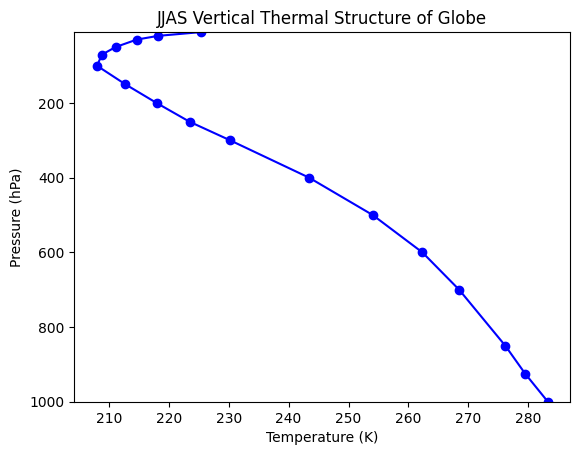

In [16]:
# Compute mean over lat, lon, and selected JJAS time
data_levels_jjas = data_jjas.mean(dim=['lat', 'lon', 'time'])

# Plot the JJAS vertical structure
plt.plot(data_levels_jjas, data_levels_jjas.level, 'bo-')  # Use blue for distinction
plt.ylim(max(data_levels_jjas.level), min(data_levels_jjas.level))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('JJAS Vertical Thermal Structure of Globe')
plt.show()


In [22]:
# Select latitudes for different regions
tropics = data_jjas.where((data_jjas.lat >= -23.5) & (data_jjas.lat <= 23.5), drop=True)
temperate = data_jjas.where(((data_jjas.lat >= 23.5) & (data_jjas.lat <= 66.5)) | 
                            ((data_jjas.lat <= -23.5) & (data_jjas.lat >= -66.5)), drop=True)
polar = data_jjas.where((data_jjas.lat >= 66.5) | (data_jjas.lat <= -66.5), drop=True)

# Print to check the latitudes
print("Tropics Lats:", tropics.lat.values)
print("Temperate Lats:", temperate.lat.values)
print("Polar Lats:", polar.lat.values)



Tropics Lats: [ 22.5  20.   17.5  15.   12.5  10.    7.5   5.    2.5   0.   -2.5  -5.
  -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5]
Temperate Lats: [ 65.   62.5  60.   57.5  55.   52.5  50.   47.5  45.   42.5  40.   37.5
  35.   32.5  30.   27.5  25.  -25.  -27.5 -30.  -32.5 -35.  -37.5 -40.
 -42.5 -45.  -47.5 -50.  -52.5 -55.  -57.5 -60.  -62.5 -65. ]
Polar Lats: [ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5 -67.5 -70.
 -72.5 -75.  -77.5 -80.  -82.5 -85.  -87.5 -90. ]


In [21]:
polar

<xarray.DataArray 'air' (time: 4, level: 17, lat: 0, lon: 144)> Size: 0B
array([], shape=(4, 17, 0, 144), dtype=float32)
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 0B 
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 32B 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
Attributes: (12/14)
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (monthly from 6-hourly values)
    valid_range:    [137.5 362.5]
    actual_range:   [183.01205 314.30197]

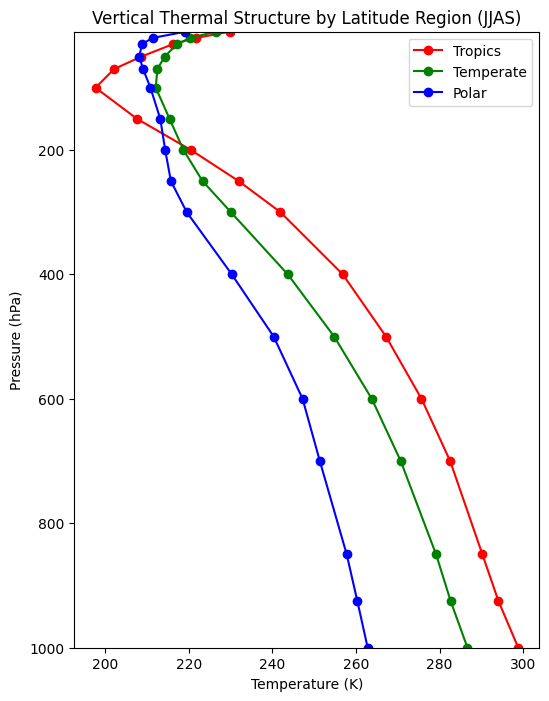

In [24]:
# Compute mean over lat, lon, and time
tropics_mean = tropics.mean(dim=['lat', 'lon', 'time'])
temperate_mean = temperate.mean(dim=['lat', 'lon', 'time'])
polar_mean = polar.mean(dim=['lat', 'lon', 'time'])

# Plot the vertical thermal structure
plt.figure(figsize=(6, 8))

plt.plot(tropics_mean, tropics_mean.level, 'ro-', label='Tropics')
plt.plot(temperate_mean, temperate_mean.level, 'go-', label='Temperate')
plt.plot(polar_mean, polar_mean.level, 'bo-', label='Polar')

plt.ylim(max(data.level), min(data.level))  # Invert y-axis
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical Thermal Structure by Latitude Region (JJAS)')
plt.legend()
plt.show()


In [33]:
## let us also load another dataset CRU dataset and see how it goes 

tmp_data = xr.open_dataset('./datasets/india.1960.2022.tmp.nc')
tmp_data

<xarray.Dataset> Size: 85MB
Dimensions:  (time: 756, lon: 80, lat: 70)
Coordinates:
  * time     (time) datetime64[ns] 6kB 1960-01-16 1960-02-15 ... 2022-12-16
  * lon      (lon) float32 320B 60.25 60.75 61.25 61.75 ... 98.75 99.25 99.75
  * lat      (lat) float32 280B 5.25 5.75 6.25 6.75 ... 38.25 38.75 39.25 39.75
Data variables:
    tmp      (time, lat, lon) float32 17MB ...
    stn      (time, lat, lon) float64 34MB ...
    mae      (time, lat, lon) float32 17MB ...
    maea     (time, lat, lon) float32 17MB ...
Attributes:
    CDI:          Climate Data Interface version 2.4.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.4
    source:       Run ID = 2406270035. Data generated from:tmp.2406262226.dtb
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.08 Mean Temperature
    history:      Sun Mar 02 23:50:59 2025: cdo -sellonlatbox,60,100,5,40 -se...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    CDO:          Climate Data Operators version 2.4.2 (https://mpimet.mpg.de...

In [34]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs

tmp_data = tmp_data['tmp']
tmp_data
# let us visualise the spatial data and see how it goes 




<xarray.DataArray 'tmp' (time: 756, lat: 70, lon: 80)> Size: 17MB
[4233600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 6kB 1960-01-16 1960-02-15 ... 2022-12-16
  * lon      (lon) float32 320B 60.25 60.75 61.25 61.75 ... 98.75 99.25 99.75
  * lat      (lat) float32 280B 5.25 5.75 6.25 6.75 ... 38.25 38.75 39.25 39.75
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

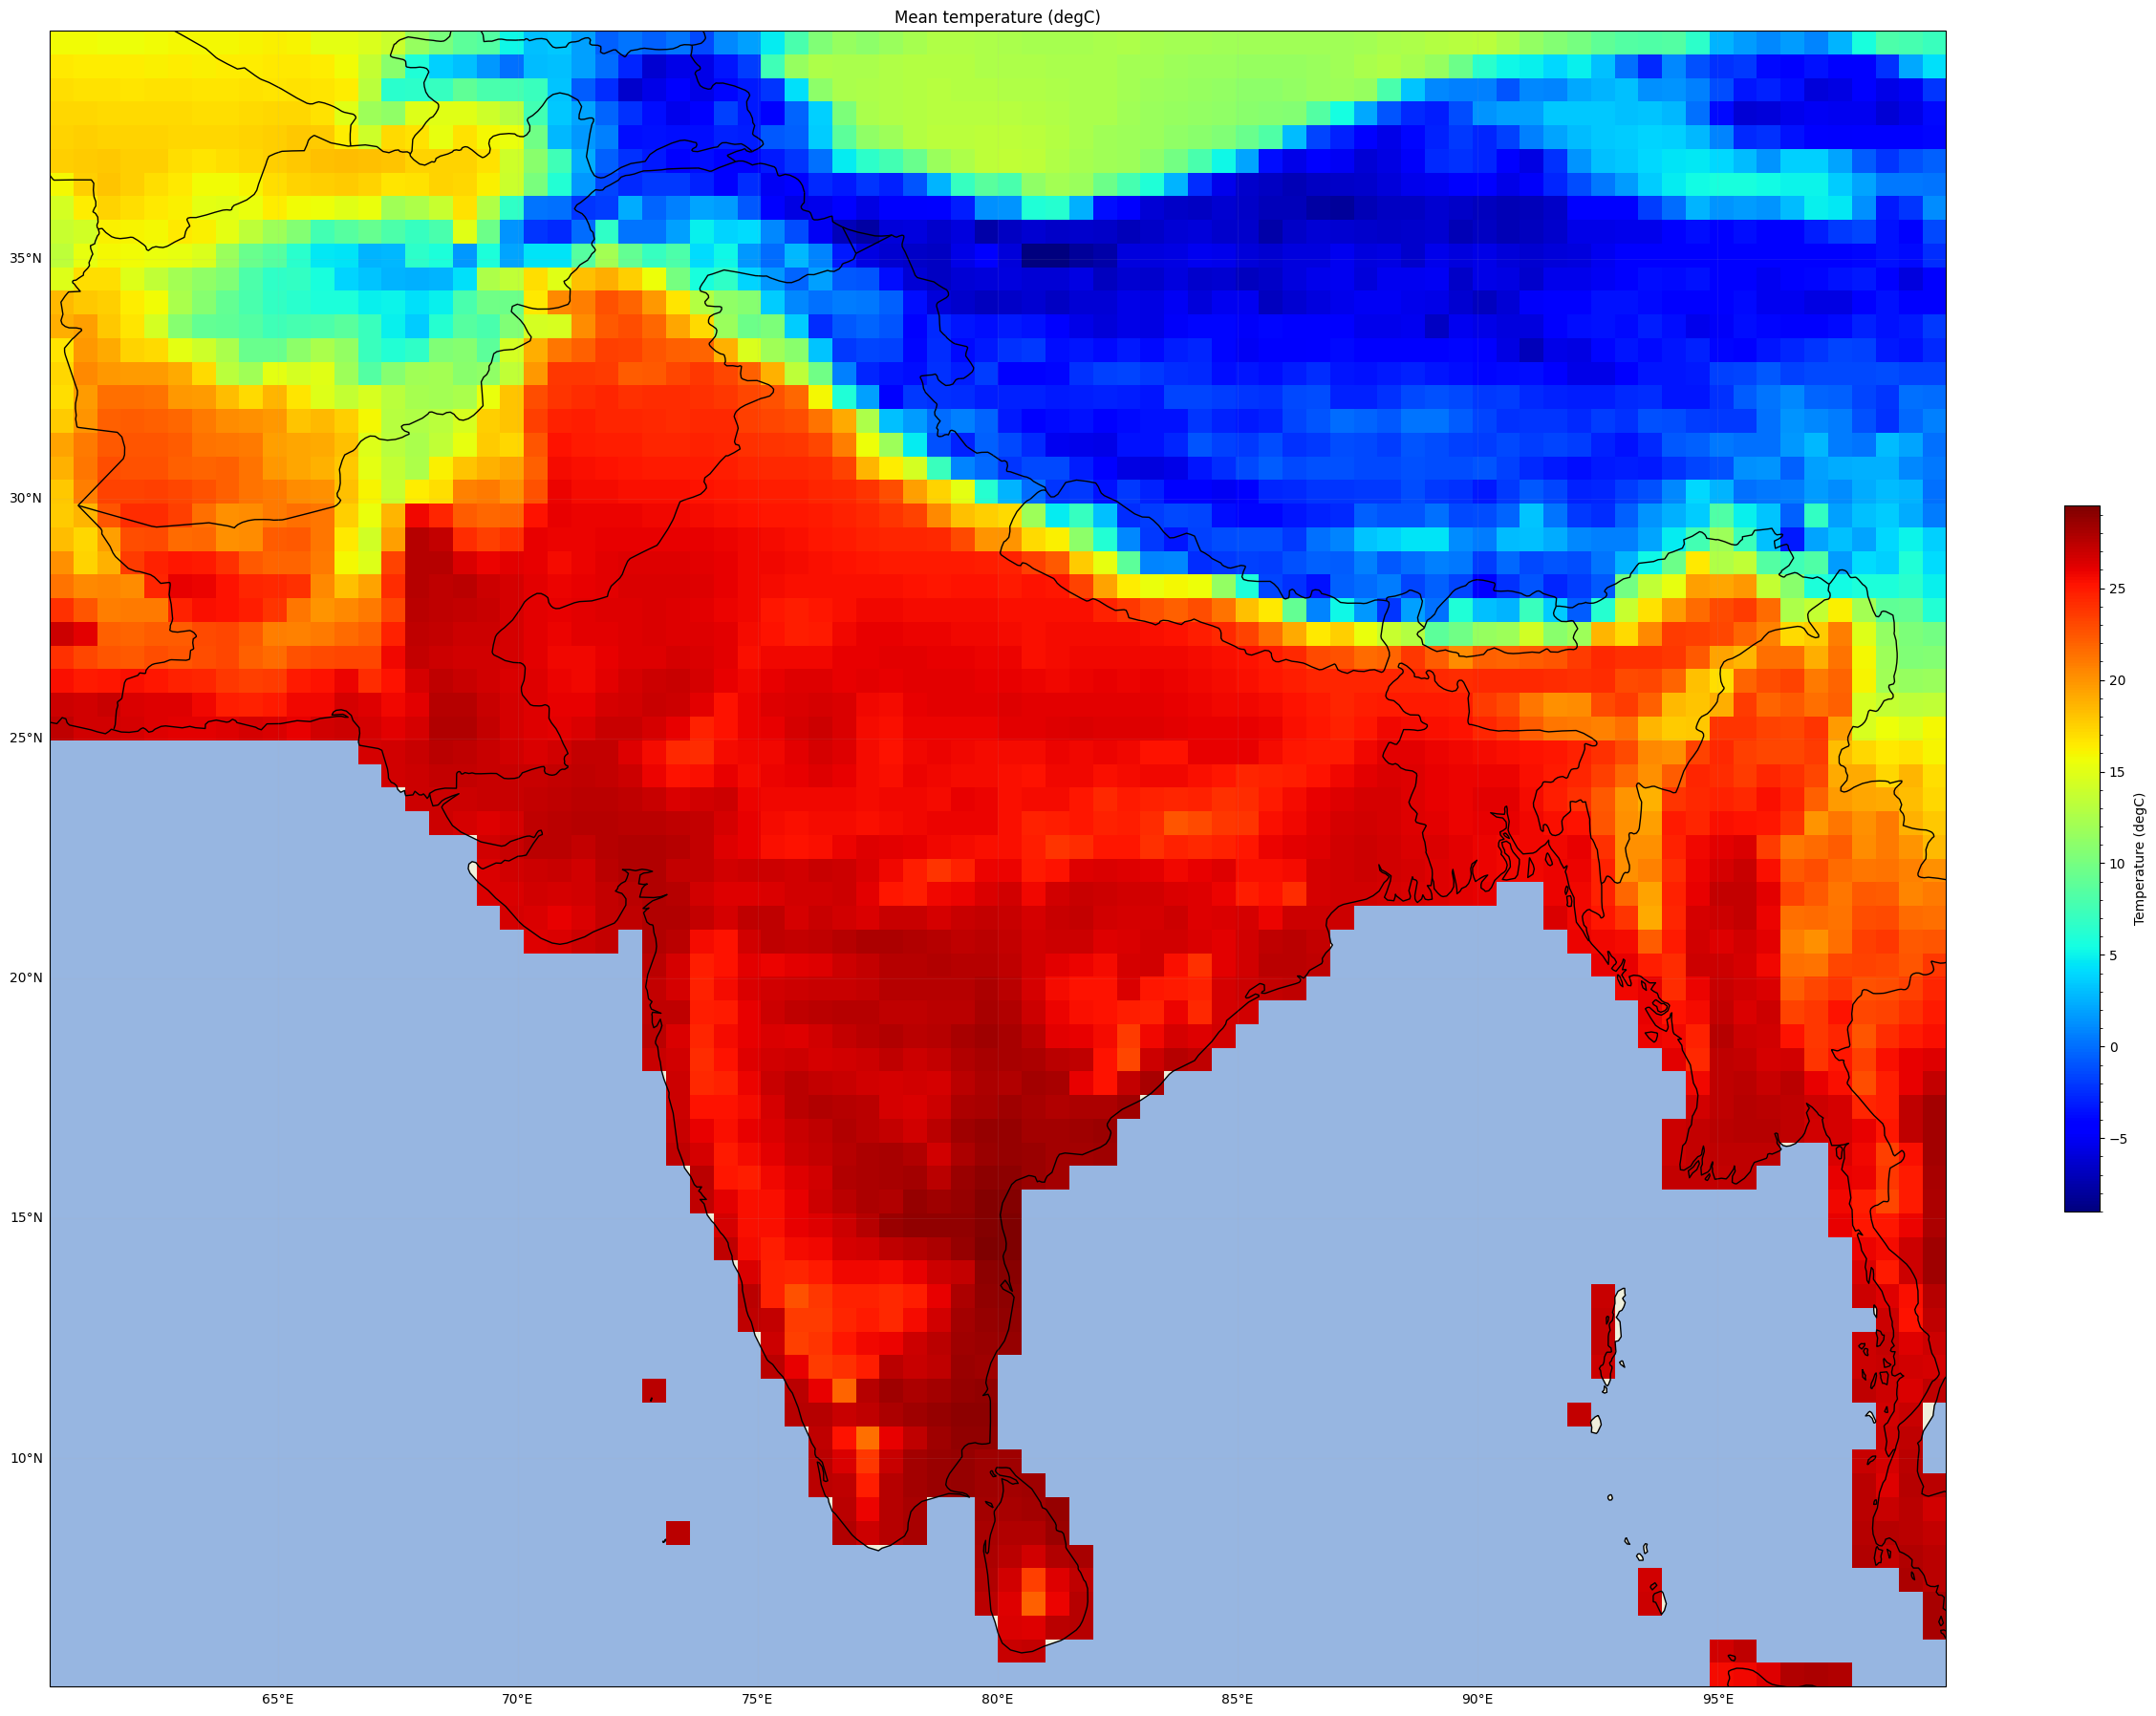

In [38]:
# take mean along the time dimension 
tmp_time_mean = tmp_data.mean(dim='time')

# #extracting lat and lon 

lat = tmp_data.lat
lon = tmp_data.lon

fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(tmp_time_mean,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower')
plt.title('Mean temperature (degC)')
# plt.legend(['Temp'])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
# ax.add_feature(states_provinces, edgecolor='blue')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Temperature (degC)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False
plt.show()


In [39]:
## let us do a timeseries analysis now and see how has temp risen in india 

# take mean along the lat and lon 

tmp_fldmean = tmp_data.mean(dim=['lat','lon'])
tmp_fldmean

<xarray.DataArray 'tmp' (time: 756)> Size: 3kB
array([ 5.0088606,  9.127257 , 11.211168 , 16.142391 , 19.85446  ,
       22.20737  , 22.011168 , 21.603151 , 19.534798 , 15.233868 ,
        9.73145  ,  6.3620534,  5.6461883,  6.435528 , 12.407173 ,
       16.73201  , 20.221886 , 21.913137 , 22.228186 , 21.52329  ,
       19.465458 , 15.063994 ,  9.379156 ,  5.319128 ,  4.2342615,
        7.8447256, 12.060478 , 16.78329  , 19.756739 , 21.813221 ,
       22.403883 , 21.249113 , 18.92557  , 14.909395 ,  9.37623  ,
        5.795106 ,  4.7259912,  8.598594 , 12.095274 , 16.440788 ,
       19.613783 , 21.849705 , 22.379494 , 21.34934  , 19.388664 ,
       15.811505 , 10.553503 ,  6.072518 ,  3.7307456,  7.3394933,
       13.046583 , 17.249874 , 19.526218 , 21.660759 , 21.738285 ,
       21.448158 , 19.191647 , 15.140533 ,  9.847258 ,  5.445261 ,
        5.849029 ,  7.277469 , 11.2693405, 15.955415 , 19.918118 ,
       22.026358 , 21.98515  , 20.93502  , 18.935501 , 15.756962 ,
       10.782054 ,  6.248298 ,  6.134909 ,  9.457637 , 12.457777 ,
       16.64104  , 19.939972 , 21.978455 , 22.39744  , 21.62813  ,
       18.976147 , 15.004529 ,  9.889985 ,  6.1774964,  4.5146265,
        7.852011 , 11.381182 , 16.001968 , 19.653082 , 21.650381 ,
       22.141603 , 21.168438 , 19.111055 , 14.887594 ,  9.651083 ,
        6.1714487,  4.814262 ,  6.121322 , 12.2345705, 15.977862 ,
...
        5.797243 ,  9.057496 , 12.520197 , 17.260592 , 21.051025 ,
       22.376598 , 22.696148 , 21.835556 , 19.904108 , 16.452744 ,
       11.654739 ,  7.3481293,  6.521519 ,  9.281519 , 14.006807 ,
       18.224812 , 21.052631 , 22.948242 , 22.765905 , 22.072094 ,
       20.35291  , 16.16017  , 10.9304085,  8.537075 ,  6.1617155,
        8.992236 , 12.726666 , 17.857695 , 21.218735 , 22.352348 ,
       22.742897 , 22.02765  , 20.33654  , 16.801434 , 11.312123 ,
        7.53519  ,  6.213812 ,  9.040197 , 14.402953 , 17.717243 ,
       20.612095 , 22.60858  , 22.916428 , 22.125063 , 19.795134 ,
       15.73069  , 10.881997 ,  6.7956686,  6.1423073,  8.314993 ,
       12.636371 , 18.148073 , 20.677917 , 22.828129 , 23.054598 ,
       22.159576 , 20.195274 , 16.23131  , 11.234036 ,  6.642419 ,
        5.513164 ,  8.867145 , 12.801886 , 17.142757 , 20.597664 ,
       22.248692 , 22.992687 , 22.219156 , 20.167286 , 16.193811 ,
       10.561519 ,  6.531814 ,  5.851336 ,  9.841828 , 14.129677 ,
       17.468102 , 20.533895 , 22.513952 , 23.253109 , 22.292294 ,
       20.431955 , 16.232574 , 10.672011 ,  7.2376933,  5.8801413,
        8.076653 , 14.707989 , 19.047876 , 21.019945 , 22.847708 ,
       22.786444 , 21.935501 , 20.327427 , 16.142025 , 11.546695 ,
        7.142841 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 6kB 1960-01-16 1960-02-15 ... 2022-12-16

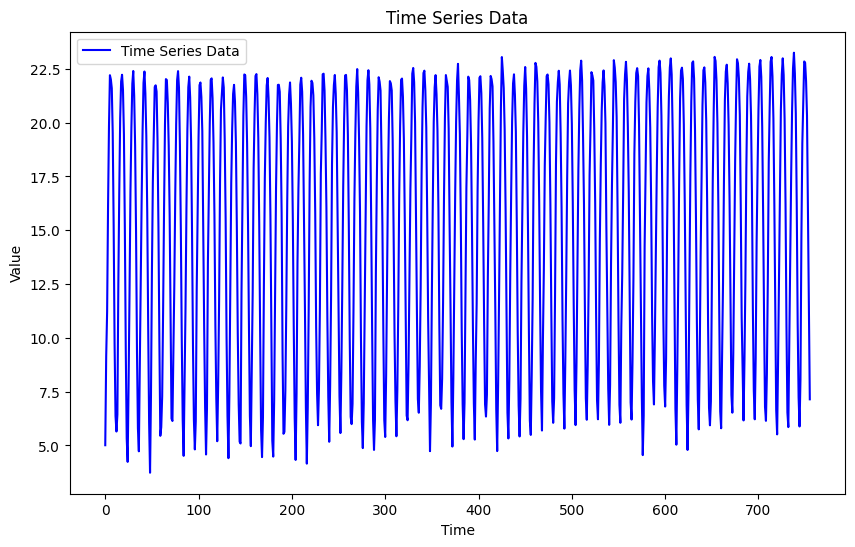

In [41]:
# now let us plot the time series data 
plt.figure(figsize=(10,6))
plt.plot(tmp_fldmean, color='blue', label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

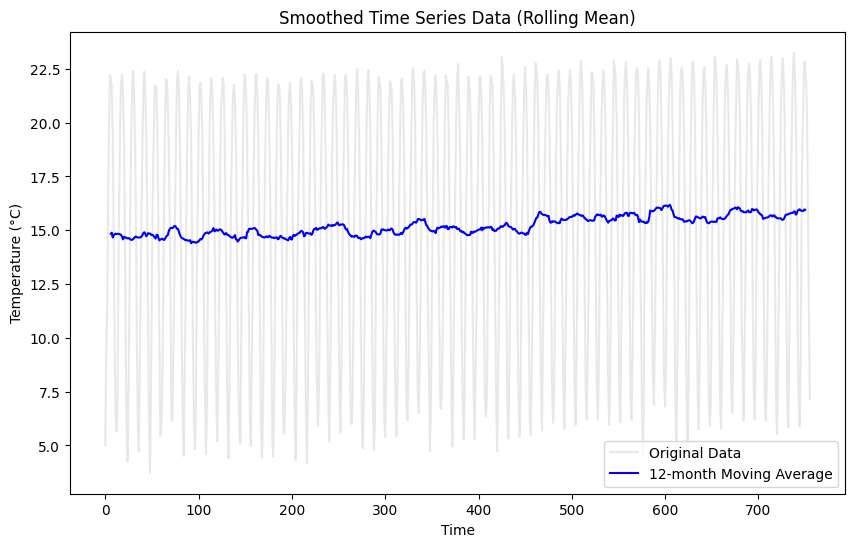

In [46]:
# Apply a rolling mean with a window of 12 months (1 year) to smooth the data
window_size = 12  # Adjust for different smoothing levels
tmp_fldmean_smoothed = tmp_fldmean.rolling(time=window_size, center=True).mean()

# Plot smoothed time series
plt.figure(figsize=(10,6))
plt.plot(tmp_fldmean, color='lightgray', alpha=0.5, label='Original Data')  # Light gray for reference
plt.plot(tmp_fldmean_smoothed, color='blue', label=f'{window_size}-month Moving Average')  # Smoothed curve

plt.title('Smoothed Time Series Data (Rolling Mean)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


/home/posiden/anaconda3/envs/climate-gpt/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


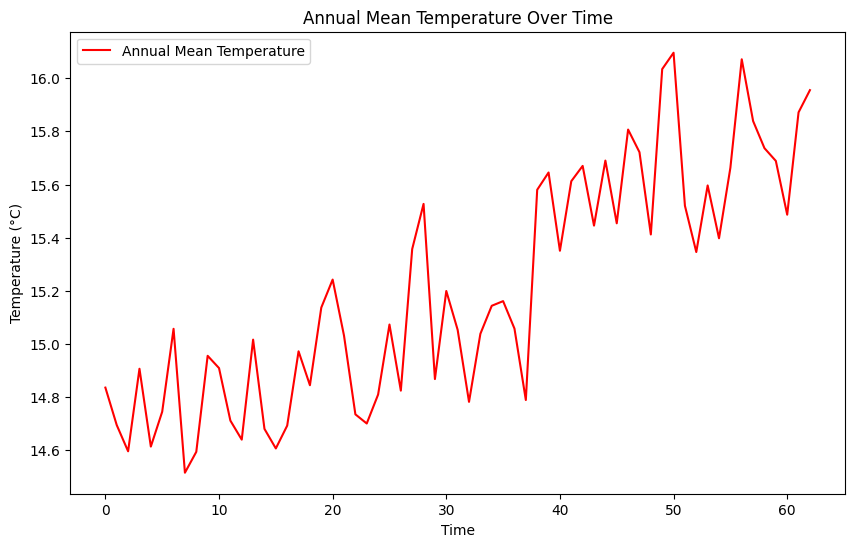

In [43]:
# Resample the data to annual means
tmp_fldmean_annual = tmp_fldmean.resample(time='1Y').mean()

# Plot resampled time series
plt.figure(figsize=(10,6))
plt.plot(tmp_fldmean_annual, color='red', label='Annual Mean Temperature')

plt.title('Annual Mean Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


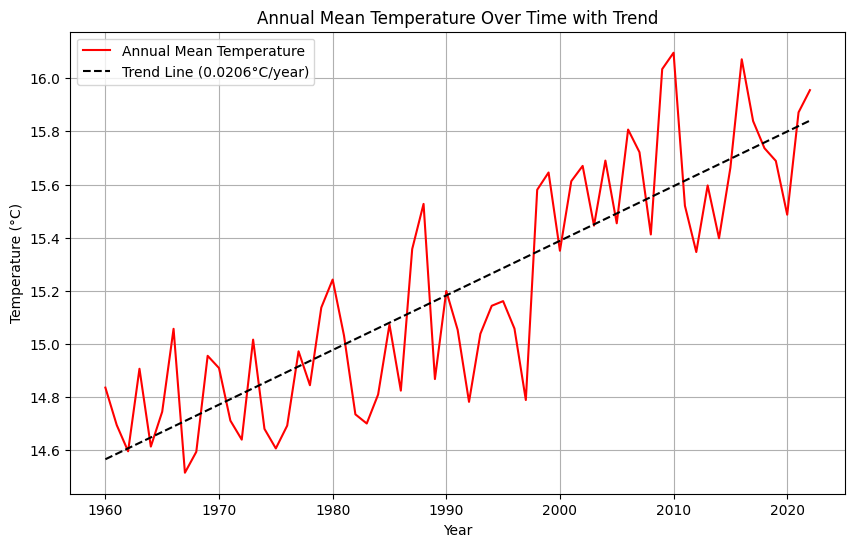

Estimated temperature increase from <xarray.DataArray 'year' ()> Size: 8B
array(1960)
Coordinates:
    time     datetime64[ns] 8B 1960-12-31
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T to <xarray.DataArray 'year' ()> Size: 8B
array(2022)
Coordinates:
    time     datetime64[ns] 8B 2022-12-31
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T: 1.27°C


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Convert time to numeric values (years)
time_numeric = tmp_fldmean_annual.time.dt.year  # Extract years
temperature_values = tmp_fldmean_annual.values  # Extract temperature values

# Fit a linear regression (1st-degree polynomial)
slope, intercept = np.polyfit(time_numeric, temperature_values, 1)

# Compute the trend line
trend_line = slope * time_numeric + intercept

# Plot the annual mean temperature
plt.figure(figsize=(10,6))
plt.plot(time_numeric, temperature_values, color='red', label='Annual Mean Temperature')

# Plot the trend line
plt.plot(time_numeric, trend_line, color='black', linestyle='--', label=f'Trend Line ({slope:.4f}°C/year)')

# Add labels, title, and legend
plt.title('Annual Mean Temperature Over Time with Trend')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

# Print total temperature increase
total_increase = slope * (time_numeric[-1] - time_numeric[0])
print(f"Estimated temperature increase from {time_numeric[0]} to {time_numeric[-1]}: {total_increase:.2f}°C")


/tmp/ipykernel_1325724/871792375.py:25: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  levels=np.arange(temperature_mean.min(), temperature_mean.max(), 5),


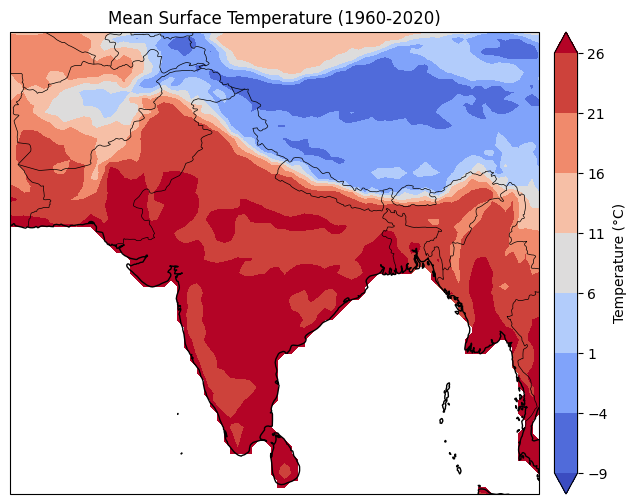

In [54]:
## okay now let us do a contour plot of temperature 

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
file_path = "./datasets/india.1960.2022.tmp.nc"  # Change to your dataset file path
ds = xr.open_dataset(file_path)

# Select the temperature variable (adjust based on dataset)
temperature = ds['tmp']

# Compute mean over a specific period (e.g., 1960-2020)
temperature_mean = temperature.mean(dim='time')

# Create a figure with Cartopy projection
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the filled contours of temperature
contour = plt.contourf(temperature_mean.lon, temperature_mean.lat, temperature_mean, 
                        levels=np.arange(temperature_mean.min(), temperature_mean.max(), 5), 
                        cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())

# Add coastlines and borders for context
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(contour, orientation="vertical", pad=0.02)
cbar.set_label('Temperature (°C)')

# Add title and labels
plt.title('Mean Surface Temperature (1960-2020)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()
